### Mounting drive on Colab

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


###Libraries

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 12.2 MB/s 


In [ ]:
import os
import cv2
import os
import h5py
import numpy as np
import pickle
from tqdm import tqdm
from PIL import Image
import tensorflow as tf
import tensorflow_addons as tfa
os.chdir('/gdrive/My Drive/')
from numpy import savez_compressed
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import tensorflow_datasets as tfds
from tensorflow_addons.metrics import HammingLoss
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras import layers, models
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

## Applying transformations and preparing dataset

In [ ]:
class get_transformations:
    def __init__(self, trainData, classes): 
      self.data = trainData
      self.classes = classes

    def blur(self, img, label):
      image = cv2.medianBlur(img, 5)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      image = cv2.blur(img, (5,5))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      image = cv2.bilateralFilter(img, 20, 10, 10)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      image = cv2.GaussianBlur(img, (5,5), 10000)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

    def brightness(self, img, label):
      img = Image.fromarray(np.uint8(img)).convert('RGB')
      enhancer = ImageEnhance.Brightness(img)
      image = enhancer.enhance(1)
      image = np.asarray(image)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      img = Image.fromarray(np.uint8(img)).convert('RGB')
      enhancer = ImageEnhance.Brightness(img)
      image = enhancer.enhance(1.5)
      image = np.asarray(image)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      img = Image.fromarray(np.uint8(img)).convert('RGB')
      enhancer = ImageEnhance.Brightness(img)
      image = enhancer.enhance(2)
      image = np.asarray(image)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      img = Image.fromarray(np.uint8(img)).convert('RGB')
      enhancer = ImageEnhance.Brightness(img)
      image = enhancer.enhance(0.5)
      image = np.asarray(image)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)

      img = Image.fromarray(np.uint8(img)).convert('RGB')
      enhancer = ImageEnhance.Brightness(img)
      image = enhancer.enhance(0.2)
      image = np.asarray(image)
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis=0)
      self.classes = np.append(self.classes, label)
        
        
    def rotate_flip(self, img, label):
      rows, cols = img.shape[:2]
      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), 15, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), 30, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), 60, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)
      
      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), 90, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), -15, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), -30, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), -45, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), -60, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)
      
      Matrix = cv2.getRotationMatrix2D((cols//2, rows//2), -90, 1)
      image = cv2.warpAffine(img, Matrix, (cols, rows))
      image = np.reshape(image, (1, 96, 96, 3))
      self.data = np.append(self.data, image, axis = 0)
      self.classes = np.append(self.classes, label)

    def apply_transformations(self, trainData, trainLabels):
      for i, j in zip(trainData, trainLabels):
        get_transformations.blur(self, i, j)
        get_transformations.brightness(self, i, j)
        get_transformations.rotate_flip(self, i, j)
        
    def get_img_data(self):
      return self.data, self.classes

In [ ]:
data = []
labels = []
classes = 15
cur_path = os.getcwd()

In [ ]:
for i in tqdm(range(classes)):
    path = os.path.join(cur_path,'Circuit Dataset',str(i))
    images = os.listdir(path)
    for a in images:
        image = cv2.imread(path + '/'+ a)
        image = cv2.resize(image,(96,96))
        image = np.array(image)
        data.append(image)
        labels.append(i)

100%|██████████| 15/15 [01:51<00:00,  7.43s/it]


In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
labels

array([ 0,  0,  0, ..., 14, 14, 14])

In [ ]:
print(data.shape, labels.shape)

(1500, 96, 96, 3) (1500,)


In [ ]:
transformer = get_transformations(data, labels)  
transformer.apply_transformations(data, labels)
data, labels = transformer.get_img_data()

In [ ]:
data.shape

(30000, 96, 96, 3)

In [ ]:
labels.shape

(30000,)

In [ ]:
np.save('ytrain', labels)
np.save('Xtrain', data)

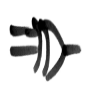

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(data[1480])

## Baseline Model - InceptionV3

### Testing Baseline model with Imagenet as a source

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

pre_trained_model = InceptionV3(input_shape = (96, 96, 3), 
                                include_top = False, 
                                weights = 'None')
#for layer in pre_trained_model.layers:
#  layer.trainable = False

87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
def compile_model():
  from tensorflow.keras.optimizers import RMSprop

  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(pre_trained_model.output)
  # Add a fully connected layer with 2000 hidden units and ReLU activation
  x = layers.Dense(2000, activation='relu')(x)
  # Add a fully connected layer with 2000 hidden units and ReLU activation
  x = layers.Dense(1000, activation='relu')(x)
  # Add a fully connected layer with 2000 hidden units and ReLU activation
  x = layers.Dense(500, activation='relu')(x)                  
  # Add a final softmax layer for classification
  x = layers.Dense  (15, activation='softmax')(x)           

  model = Model( pre_trained_model.input, x) 

  model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), HammingLoss(threshold=0.5, mode='multiclass'), F1Score(num_classes= 15, threshold=0.5)])
  return model

In [ ]:
data = np.load('Xtrain.npy', allow_pickle=True)
labels = np.load('ytrain.npy', allow_pickle=True)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42, stratify = labels)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [ ]:
y_train = to_categorical(y_train, 15)
y_val = to_categorical(y_val, 15)
y_test = to_categorical(y_test, 15)

In [ ]:
imagenet_inception_v3 = compile_model()
history = imagenet_inception_v3.fit(X_train, y_train, batch_size = 200, epochs=15, validation_data=(X_val, y_val), callbacks = [cb])
print("***********train time for each epoch is", cb.logs,"***************")
print("***********total train time is", sum(cb.logs),"***************")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
120/120 [==============================] - 43s 197ms/step - loss: 16.7126 - acc: 0.1113 - auc: 0.5455 - recall: 0.0902 - precision: 0.1157 - hamming_loss: 0.9098 - f1_score: 0.1012 - val_loss: 9.6746 - val_acc: 0.1113 - val_auc: 0.5478 - val_recall: 0.0977 - val_precision: 0.1082 - val_hamming_loss: 0.9023 - val_f1_score: 0.0618
Epoch 2/15
120/120 [==============================] - 21s 177ms/step - loss: 3.8391 - acc: 0.1778 - auc: 0.6329 - recall: 0.0944 - precision: 0.2502 - hamming_loss: 0.9056 - f1_score: 0.1344 - val_loss: 2.6411 - val_acc: 0.2353 - val_auc: 0.7080 - val_recall: 0.0837 - val_precision: 0.4547 - val_hamming_loss: 0.9163 - val_f1_score: 0.1293
Epoch 3/15
120/120 [==============================] - 21s 177ms/step - loss: 2.6866 - acc: 0.2439 - auc: 0.7124 - recall: 0.1080 - precision: 0.4392 - hamming_loss: 0.8920 - f1_score: 0.1684 - val_loss: 2.5750 - val_acc: 0.2607 - val_auc: 0.7203 - val_recall: 0.1233 - val_precision: 0.4987 - val_hamming_loss: 0.8767

Text(0.5, 0, 'epoch')

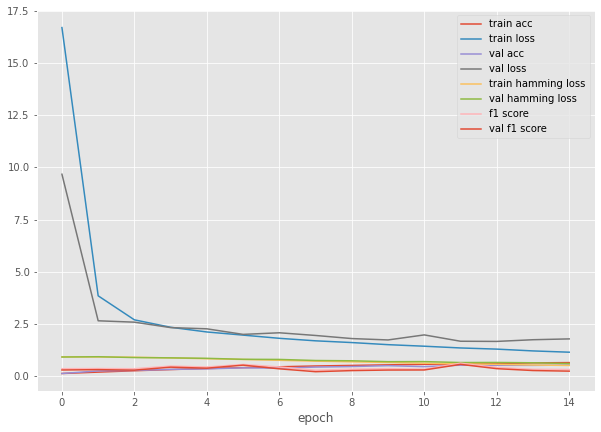

In [ ]:
plt.style.use(['ggplot'])
plt.figure(figsize=(10, 7))

plt.plot(history.history['acc'], label = 'train acc')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_acc'], label = 'val acc')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.plot(history.history['hamming_loss'], label = 'train hamming loss')
plt.plot(history.history['val_hamming_loss'], label = 'val hamming loss')
plt.plot(sum(history.history['f1_score'])/15, label = 'f1 score')
plt.plot(sum(history.history['val_f1_score'])/15, label = 'val f1 score')

plt.legend()

plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

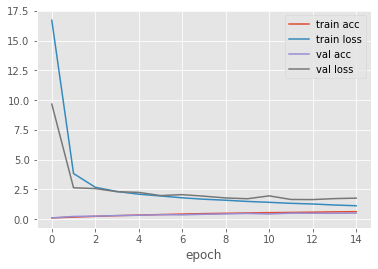

In [ ]:
plt.style.use(['ggplot'])

plt.plot(history.history['acc'], label = 'train acc')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_acc'], label = 'val acc')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.legend()

plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

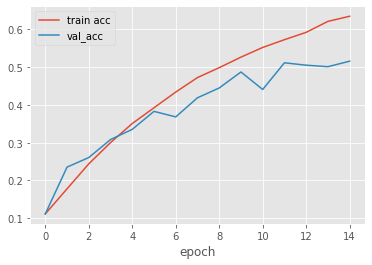

In [ ]:
plt.style.use(['ggplot'])

plt.plot(history.history['acc'], label = 'train acc')
plt.plot(history.history['val_acc'], label = 'val_acc')

plt.legend()

plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

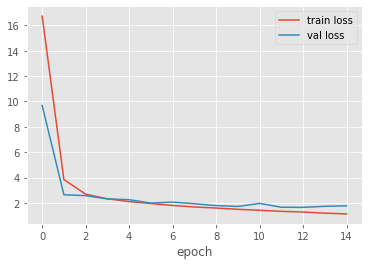

In [ ]:
plt.style.use(['ggplot'])
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

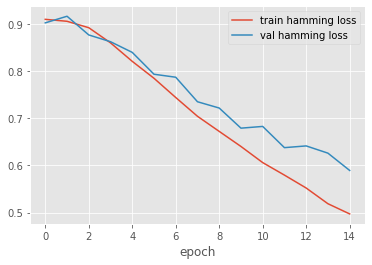

In [ ]:
plt.style.use(['ggplot'])
plt.plot(history.history['hamming_loss'], label = 'train hamming loss')
plt.plot(history.history['val_hamming_loss'], label = 'val hamming loss')
plt.legend()
plt.xlabel('epoch')

In [ ]:
score = imagenet_inception_v3.evaluate(X_test, y_test, verbose=0)
print(score)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])
print('ROC-AUC', score[2])
print('Recall', score[3])
print('Precision', score[4])
print('Hamming Loss', score[5])
print('F1Score', sum(score[6])/15)

[1.8281619548797607, 0.5016666650772095, 0.8819809556007385, 0.40533334016799927, 0.6389910578727722, 0.5946666598320007, array([0.46349207, 0.48723897, 0.34509805, 0.58192086, 0.6414141 ,
       0.6763006 , 0.5641026 , 0.22510822, 0.22608697, 0.537931  ,
       0.47228917, 0.70028013, 0.5825243 , 0.3140496 , 0.23728815],
      dtype=float32)]
Test Loss: 1.8281619548797607
Test Accuracy: 0.5016666650772095
ROC-AUC 0.8819809556007385
Recall 0.40533334016799927
Precision 0.6389910578727722
Hamming Loss 0.5946666598320007
F1Score 0.4703416536251704


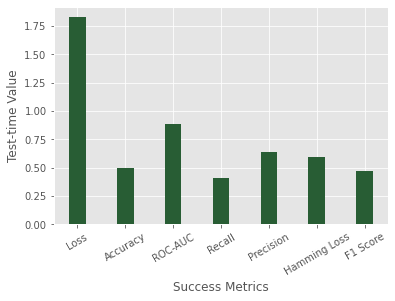

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

labels = ['Loss', 'Accuracy', 'ROC-AUC', 'Recall', 'Precision', 'Hamming Loss', 'F1 Score']

acc_imagenet = [score[0], score[1], score[2], score[3], score[4], score[5], sum(score[6])/15]

width = 0.35 

fig, ax = plt.subplots()

ax.bar(labels, acc_imagenet, width, label='ImageNet', color = '#285D34')

ax.set_xlabel('Success Metrics')
ax.set_ylabel('Test-time Value')
plt.xticks(rotation=30)
plt.show()